In [2]:
from pycocotools.coco import COCO
from PIL import Image
import matplotlib.pyplot as plt, matplotlib.patches as patches

In [3]:
coco=COCO('output/train.json')

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [6]:
# Get list of category_ids, here [1] for covid
category_ids = coco.getCatIds(['covid'])
category_ids

[1]

In [8]:
# Get list of image_ids which contain covid
image_ids = coco.getImgIds(catIds=[1])
print(image_ids[0:])

[8, 6, 7]


In [10]:
# Get all lung annotations for image 1.jpg
annotation_ids = coco.getAnnIds(imgIds=8, catIds=[1])
print(len(annotation_ids))

2


In [12]:
# These five annotation objects can then be loaded into a list anns
anns = coco.loadAnns(annotation_ids)

In [14]:
for ann in anns:
    print(ann['bbox'])

[9, 21, 109, 221]
[145, 14, 109, 237]


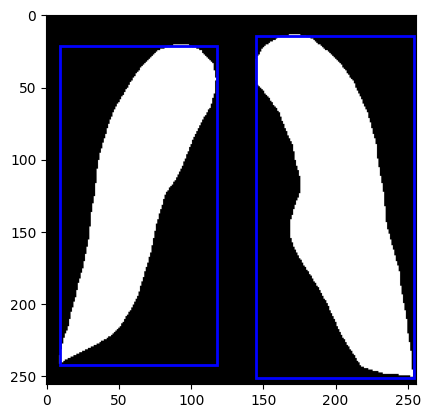

In [19]:
image_id = 8
 
image = Image.open('dataset/train_mask/covid/covid_1000.png')
# image = Image.open('dataset/test_mask/covid/covid_1003.png')
# image = Image.open('dataset/validation_mask/covid/covid_1021.png')
 
fig, ax = plt.subplots()
 
# Draw boxes and add label to each box
for ann in anns:
    box = ann['bbox']
    bb = patches.Rectangle((box[0],box[1]), box[2],box[3], linewidth=2, edgecolor="blue", facecolor="none")
    ax.add_patch(bb)
 
ax.imshow(image, cmap='gray')
plt.show()